In [566]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [8,5]

In [567]:
df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')# read the data

In [568]:
df.shape


(1338, 7)

In [569]:
df.isnull().sum()# no missing data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [570]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [571]:
## Correlation plot
corr=df.corr(numeric_only=True)
corr


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

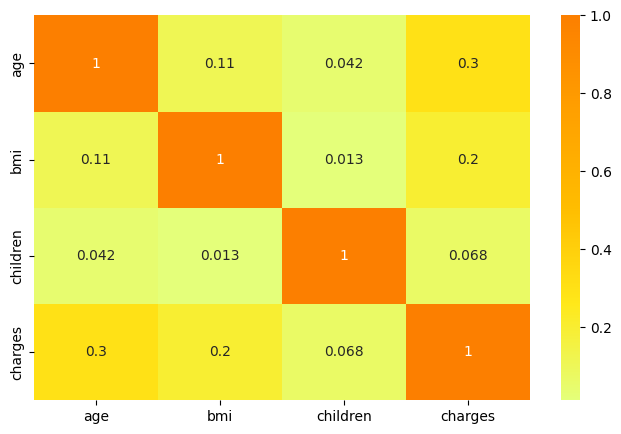

In [572]:
sns.heatmap(corr,cmap='Wistia',annot=True)

we can see no high correlation between input features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

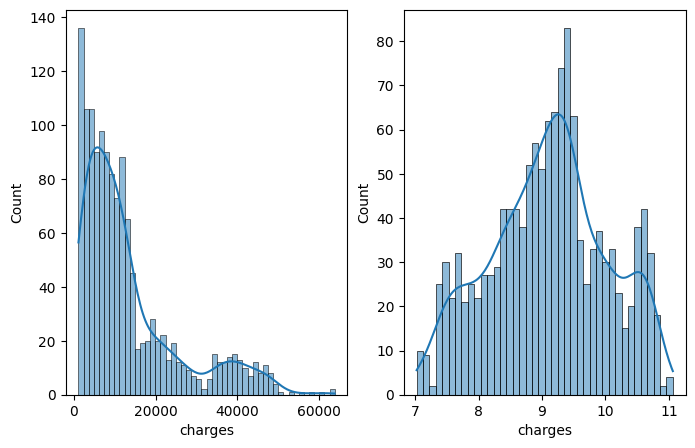

In [573]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
## target variable
sns.histplot(df['charges'],kde=True,bins=50,fill=True,ax=ax1)
## data is rightskewed -- 
## To correct the skewness in the data, we perform log transformation
sns.histplot(np.log(df['charges']),kde=True,bins=40,fill=True,ax=ax2)

<Axes: xlabel='sex', ylabel='charges'>

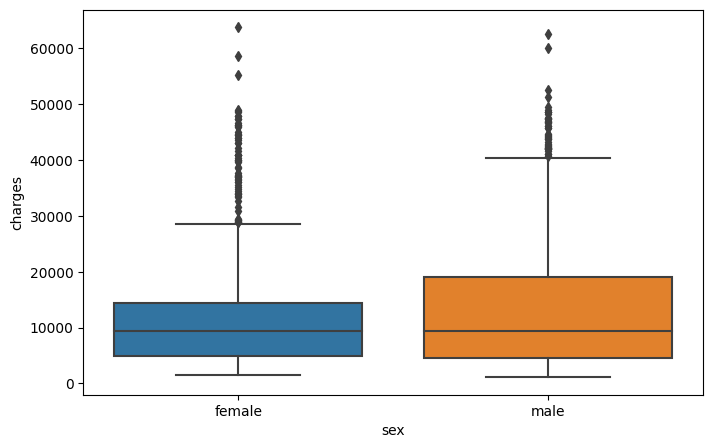

In [574]:
# fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(x='sex',y='charges',data=df)
#sns.boxplot(x='smoker',y='charges',data=df,ax=ax2)

<Axes: xlabel='smoker', ylabel='charges'>

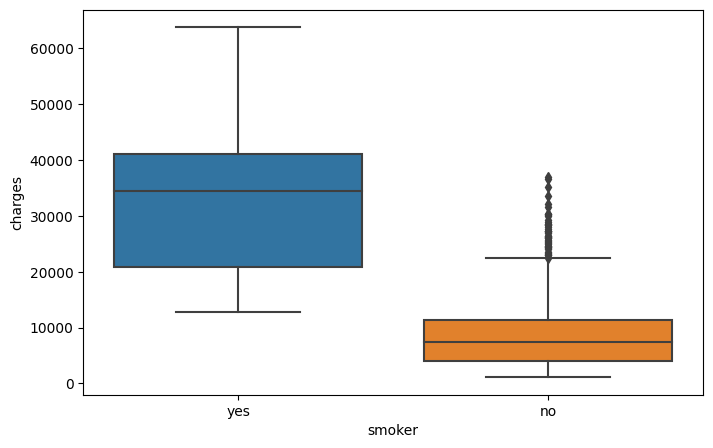

In [575]:
sns.boxplot(x='smoker',y='charges',data=df)

<Axes: xlabel='children', ylabel='charges'>

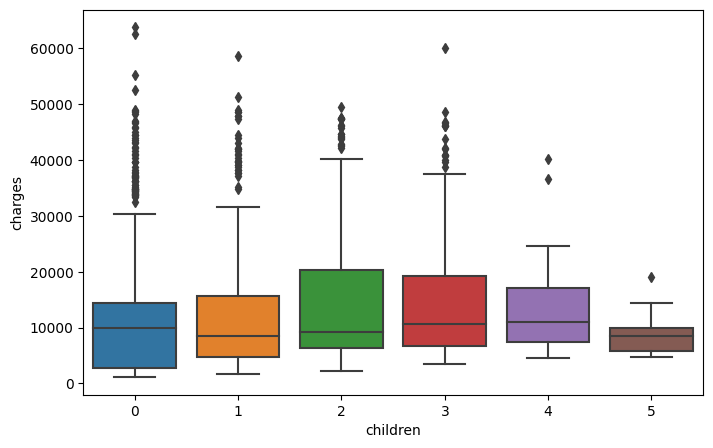

In [576]:
sns.boxplot(x='children',y='charges',data=df)

In [577]:
categorical_columns=['sex','children','smoker','region']
##one hot encoding
df_encoded=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')
df_encoded

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [578]:
df_encoded.head()
df_encoded['charges'] = np.log10(df_encoded['charges'])

In [579]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


In [580]:
X = df_encoded.drop(['charges'],axis=1) #input features
y = df_encoded['charges'] #target variable

In [581]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=23)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [582]:
lin_reg.intercept_

3.062978299536124

In [583]:
lin_reg.coef_

array([ 0.01444671,  0.00602147, -0.02944889,  0.06189173,  0.12096344,
        0.11067308,  0.21752704,  0.18325311,  0.67325594, -0.02533175,
       -0.06603729, -0.06177725])

In [584]:
y_pred=lin_reg.predict(X_test)
y_pred

array([4.05225592, 3.76880444, 4.50041927, 3.9500613 , 3.65523382,
       3.90567304, 4.6682235 , 3.7224976 , 4.12688523, 4.76463795,
       3.52544053, 4.79737927, 3.56385864, 4.10567234, 3.8222123 ,
       3.70246063, 3.7543137 , 3.52525711, 4.53766051, 4.53949591,
       4.86446396, 3.98046916, 3.85432435, 3.99085138, 4.59888988,
       3.70166436, 3.71344013, 4.17846454, 3.46393076, 3.95886114,
       4.07935735, 3.54833185, 3.64878881, 4.10271167, 3.81585639,
       4.26809615, 4.07660033, 3.92741055, 4.00423127, 3.64749407,
       3.99871209, 4.60708807, 3.99951559, 4.59038063, 4.02108629,
       4.03772313, 3.68204154, 3.72146003, 3.93416349, 3.7806824 ,
       4.08767726, 3.84661165, 3.96672129, 3.60980005, 3.66667319,
       4.06295867, 4.02343326, 3.98658583, 3.83520537, 4.18048839,
       4.32165758, 3.68561496, 3.43485214, 3.66956194, 3.53525695,
       3.75009549, 3.48748368, 3.45207354, 3.66021303, 4.10617548,
       3.7749905 , 4.59310548, 3.93093647, 4.48653296, 3.48367

In [585]:
mean_squared_error(y_pred,y_test)

0.03333484879078236

In [586]:
lin_reg.score(X_test,y_test)

0.8027551570299628

In [587]:
lin_reg.score(X_train,y_train)

0.7599756019484871

In [588]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lin_reg,X,y,cv=5)
print(scores)
scores.mean()

[0.79769166 0.68660409 0.83378927 0.77351747 0.73384828]


0.7650901530386103

In [589]:
#now with deep learning

In [590]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd






In [591]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_np = np.array(y_test)
y_test_tensor = torch.FloatTensor(y_test_np)

In [592]:
X_test

array([[ 0.40114007, -0.89153925, -1.0246016 , ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -1.0246016 , ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -1.0246016 , ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876,  0.97598911, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -1.0246016 , ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -1.0246016 , ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [593]:
# Combine features and labels into TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [594]:
# Define the MLP model with dropout
class NeuralNetwork(nn.Module):
    def __init__(self): #declare the architecture
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # You can adjust the dropout rate
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
# Define model parameters
input_size = X_train.shape[1]
input_size

12

In [595]:

# Instantiate the model
model = NeuralNetwork()

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [596]:
# Training loop
num_epochs = 100  # You can adjust this
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, you can use the model to make predictions on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)

# Convert predictions to numpy array for further analysis
test_predictions = test_predictions.numpy()

Epoch [10/100], Loss: 15.4157


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1070])) that is different to the input size (torch.Size([1070, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [20/100], Loss: 13.6176
Epoch [30/100], Loss: 11.9391
Epoch [40/100], Loss: 10.4692
Epoch [50/100], Loss: 9.1224
Epoch [60/100], Loss: 7.6005
Epoch [70/100], Loss: 6.5264
Epoch [80/100], Loss: 5.4469
Epoch [90/100], Loss: 4.4934
Epoch [100/100], Loss: 3.6989
